<a href="https://colab.research.google.com/github/Pavi4126/CODSOFT/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IRIS FLOWER CLASSIFICATION**

### **Import necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

### **Load the dataset**

In [3]:
df = pd.read_csv("/content/IRIS.csv")

### **Explore the data**

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**Column names of the dataset**

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

**Shape of the dataset**

In [7]:
df.shape

(150, 5)

**Dataset Information**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Summary statistics of the dataset**

In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Data Cleaning and Preprocessing**

**Checking for missing values in the dataset**

In [10]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Checking for duplicates in the dataset**

In [11]:
df.duplicated().sum()

3

**Removing duplicates**

In [12]:
df.drop_duplicates(inplace= True)

**Shape of the dataset after removing duplicates**

In [13]:
df.shape

(147, 5)

### **Analysis and Visualization**

**Count of each species**

In [14]:
count = df['species'].value_counts().reset_index()
count

,species,count
0,Iris-versicolor,50
1,Iris-virginica,49
2,Iris-setosa,48


<Axes: xlabel='species', ylabel='count'>

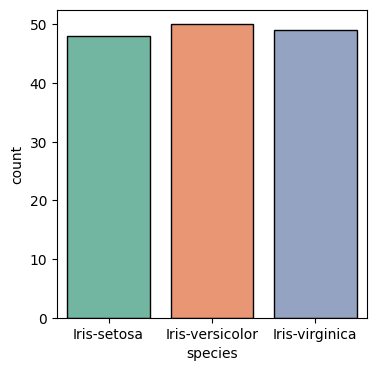

In [15]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.countplot(x='species',data=df, palette="Set2", edgecolor="black")

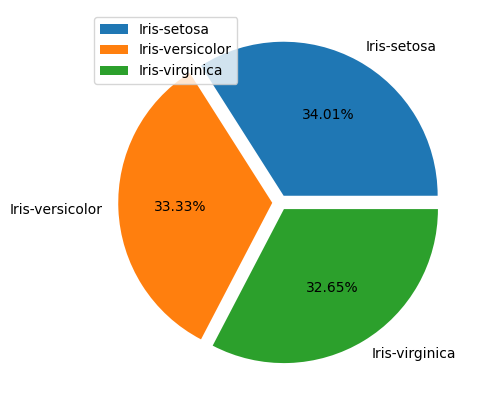

In [16]:
plt.figure(figsize=(6,5))
plt.pie(count['count'],labels=['Iris-setosa','Iris-versicolor','Iris-virginica'],autopct='%1.2f%%',explode=[0.05,0.05,0.05])
plt.legend(loc='upper left')
plt.show()

**Distribution of species by its Sepal_length and Sepal_width**

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

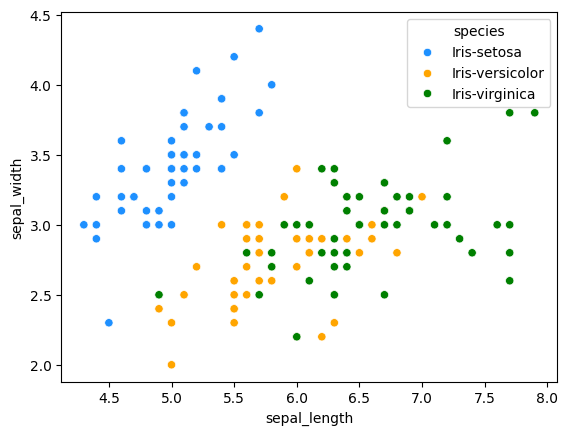

In [17]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='species',palette=['dodgerblue', 'orange', 'green'])

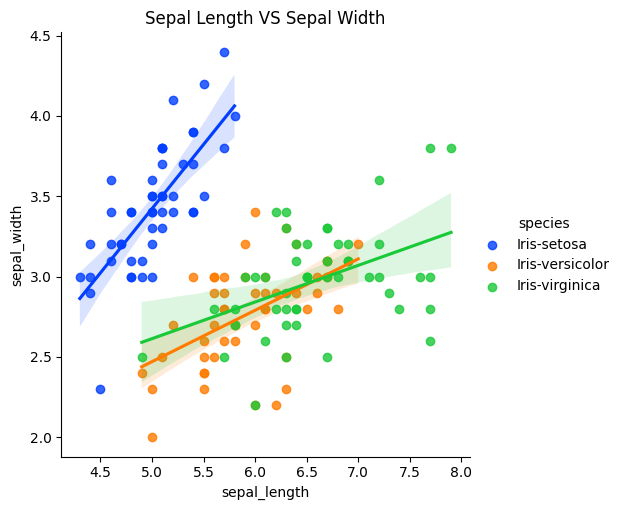

In [18]:
sns.lmplot(x="sepal_length", y="sepal_width", hue="species", palette="bright", data=df, height=5, aspect=1)

plt.title("Sepal Length VS Sepal Width")
plt.show()

**Distribution of species by its Petal_length and Petal_width**

<Axes: xlabel='petal_length', ylabel='petal_width'>

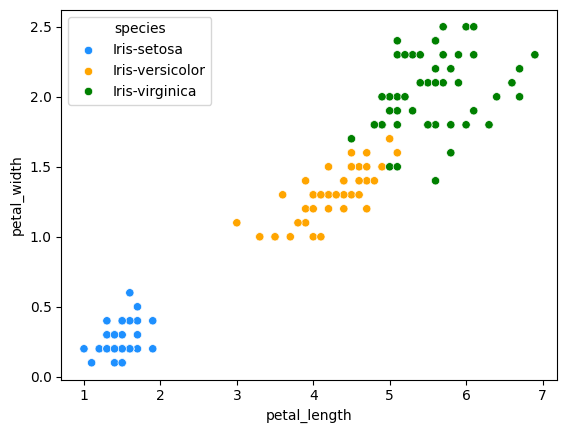

In [19]:
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='species',palette=['dodgerblue', 'orange', 'green'])

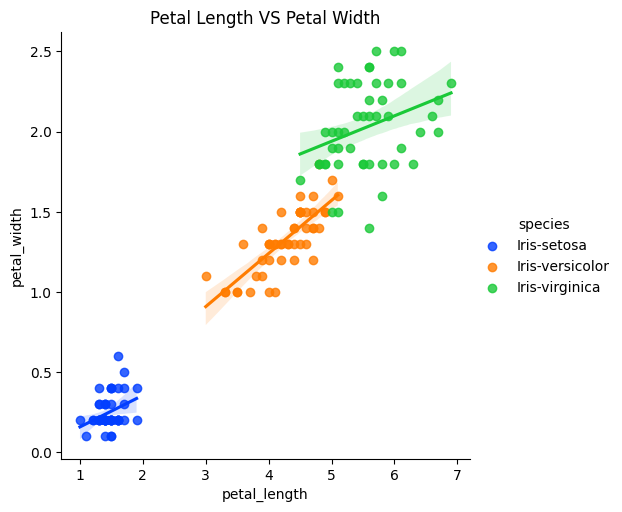

In [20]:
sns.lmplot(x="petal_length", y="petal_width", hue="species", palette="bright", data=df, height=5, aspect=1)

plt.title("Petal Length VS Petal Width")
plt.show()

**Correlation Heatmap**

In [21]:
df1 = df.drop(columns = 'species', axis=1)

In [22]:
df1.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


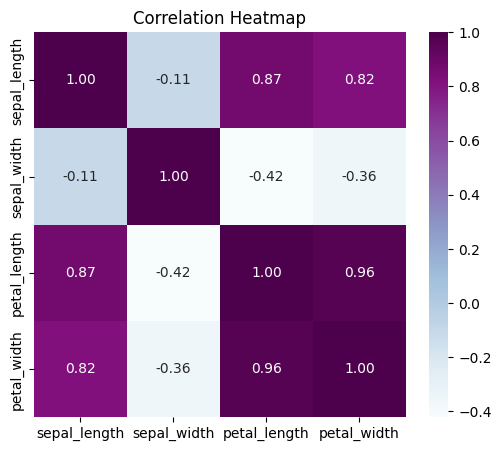

In [23]:
plt.figure(figsize=(6, 5))
sns.heatmap(df1.corr(), annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### **Logistic Regression**

**Encode categorical variables**

In [24]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


**Feature Selection**

In [25]:
X = df.drop(columns='species')
Y = df['species']

**Model Selection and Training**

In [26]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=43)
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

**Model Evaluation**

In [27]:
y_pred = model.predict(x_test)

print("Predicted classes:", y_pred)
print("Actual classes:", y_test.values)
print("Accuracy:", accuracy_score(y_test, y_pred))

Predicted classes: [1 1 1 1 2 2 2 2 1 0 1 2 0 1 2 0 0 1 1 0 0 1 0 1 2 0 0 2 0 0]
Actual classes: [1 1 1 1 2 2 2 2 1 0 1 2 0 1 2 0 0 1 1 0 0 1 0 1 2 0 0 2 0 0]
Accuracy: 1.0


In [28]:
model.predict([[5.1,3.5,1.4,0.2]])

array([0])

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

